### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

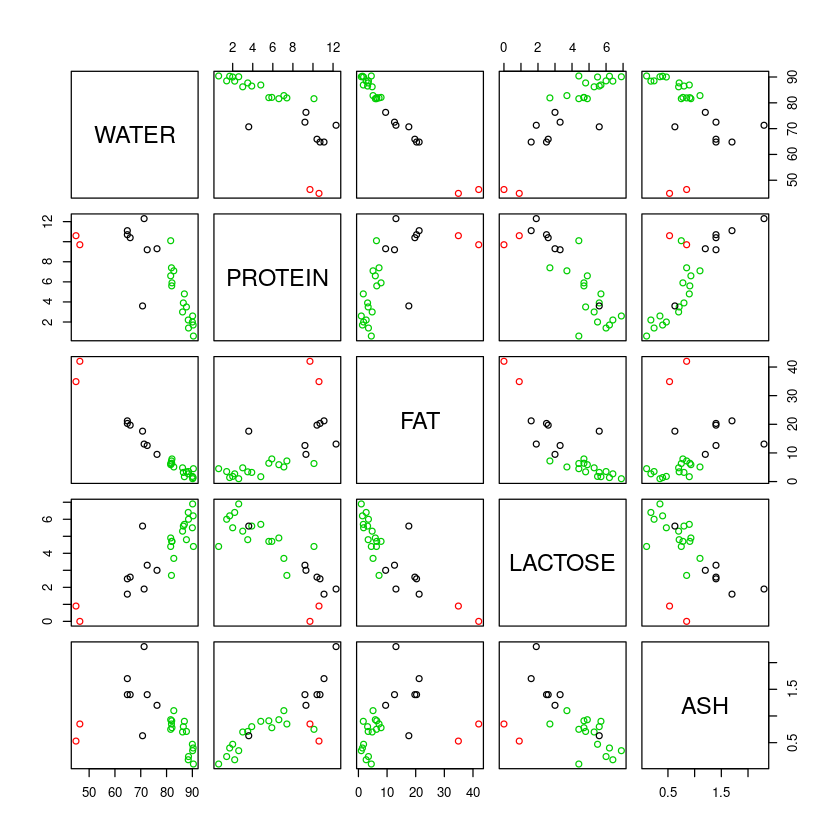

In [2]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

<b>R:</b>los datos corresponden al contenido nutricional (agua, proteinas, grasas, lactosa y minerales) en la leche de 25 especies animales. Al realizar agrupamientos podemos ver relaciones que a simple vista no serian facilmente observables, haciendo que los animales similares (del mismo grupo) sean "mas similares". 


Ejercicio 2: Interprete y comente los resultados obtenidos. 

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
2,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
3,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841


K-means clustering with 3 clusters of sizes 7, 2, 16

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 69.47143  9.514286 16.28571 2.928571 1.432857
2 45.65000 10.150000 38.45000 0.450000 0.690000
3 86.06250  4.275000  4.17500 5.118750 0.635625

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          3          3          3          3          3          3 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          1          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          2          2 

Within cluster sum of squares by cluster:
[1] 299.9911  27.1912 377.2215
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

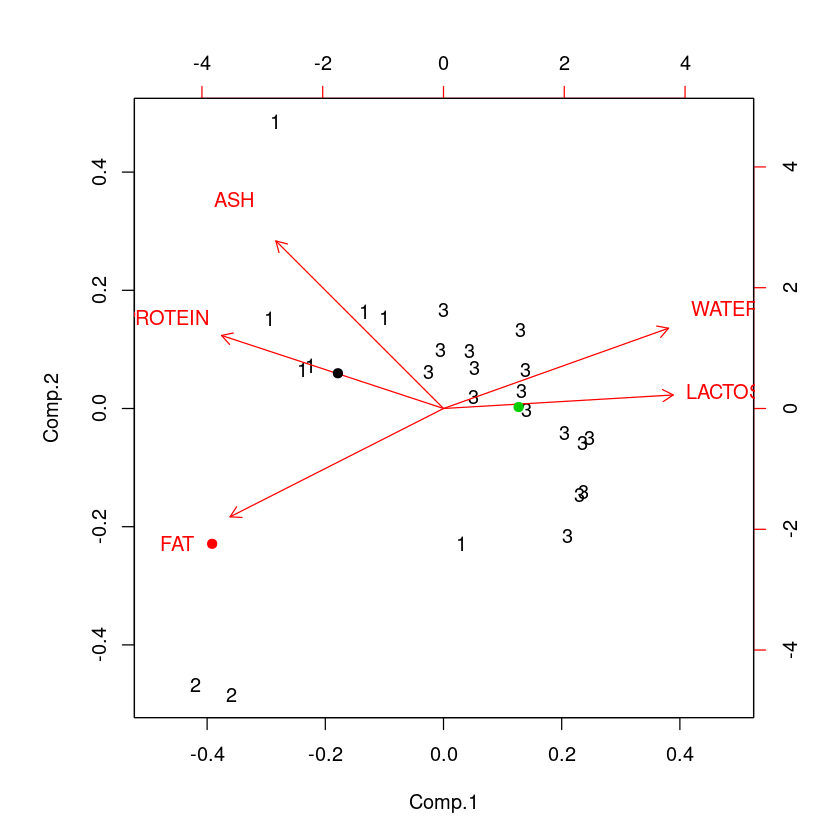

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


<b>R:</b>Definiendo 3 grupos, el modelo define usando las caracteristicas mas influyentes o distintivas a los componentes de cada grupo. en este caso separando en un grupo a los que tienen alto contenido de agua y lactosa (16 individuos), en otro los con alto contenido graso (2 individuos) y en el tercero a los que poseen un mayor contenido proteinico y mineral (7 individuos)

Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
2,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

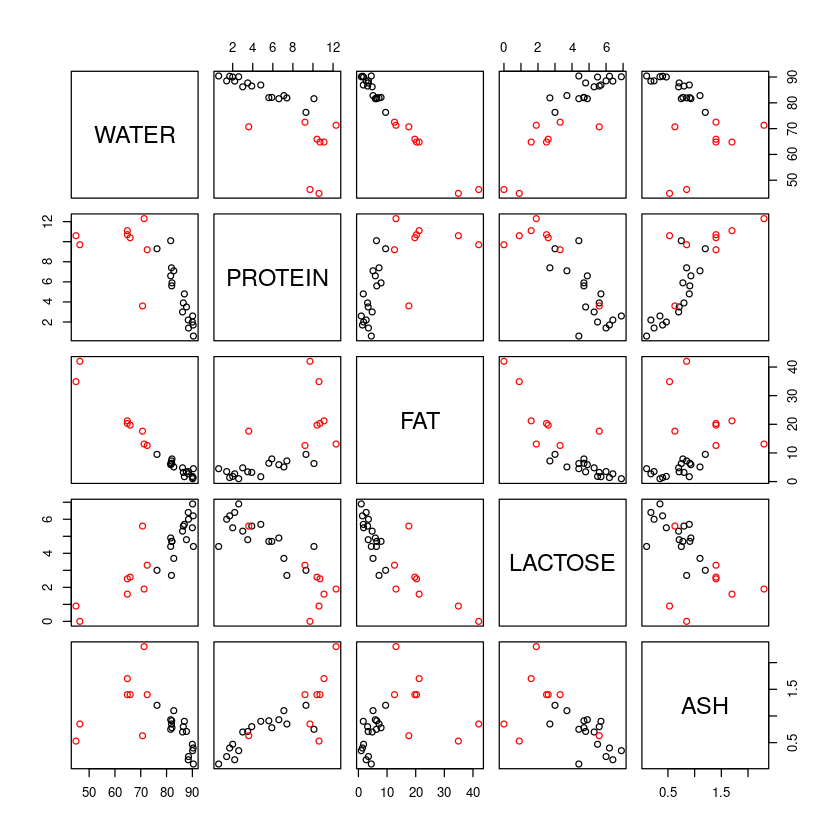

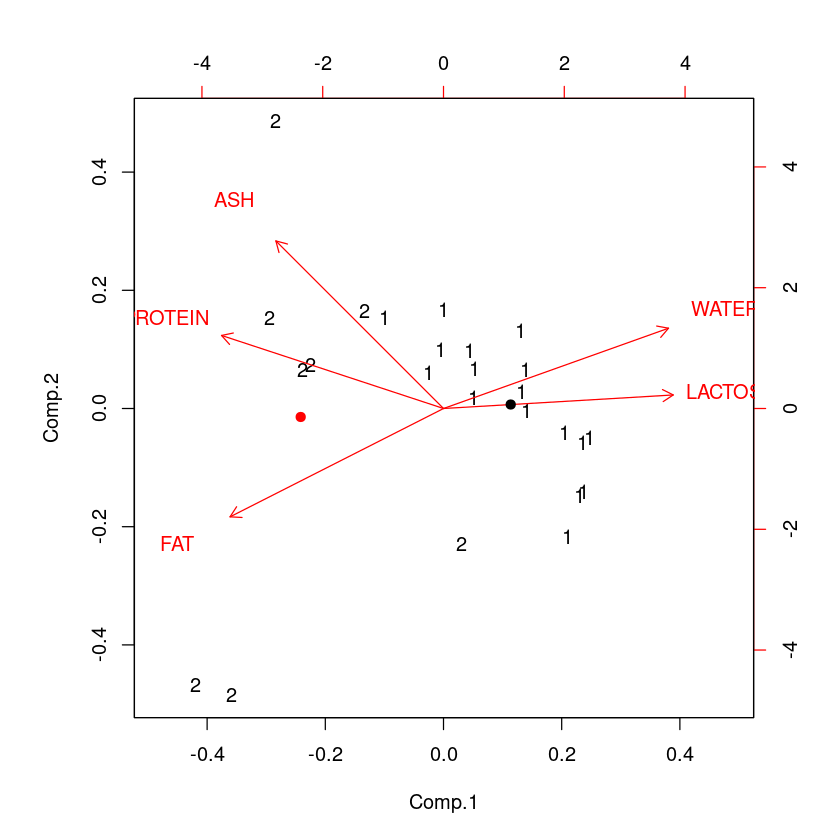

In [4]:
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595
2,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
3,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
4,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768


K-means clustering with 4 clusters of sizes 7, 2, 10, 6

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 81.18571  7.428571  6.90000 4.014286 0.9314286
2 45.65000 10.150000 38.45000 0.450000 0.6900000
3 88.50000  2.570000  2.80000 5.680000 0.4850000
4 68.33333  9.550000 17.41667 2.916667 1.4716667

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          3          3          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          1          1          4          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2 

Within cluster sum of squares by cluster:
[1]  63.53491  27.19120  59.41225 191.74708
 (between_SS / tot

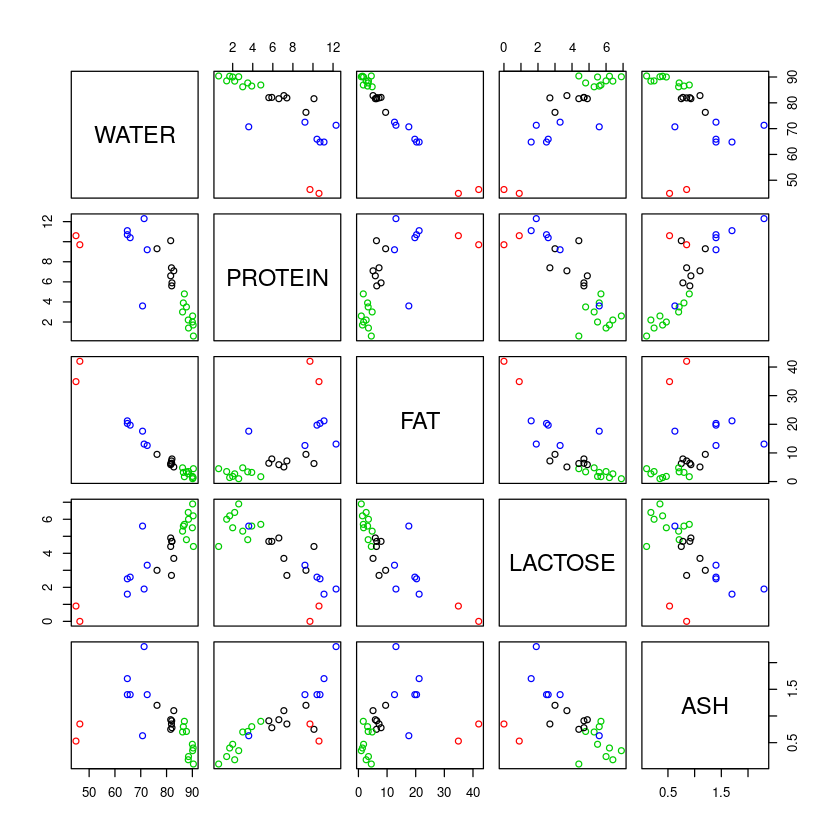

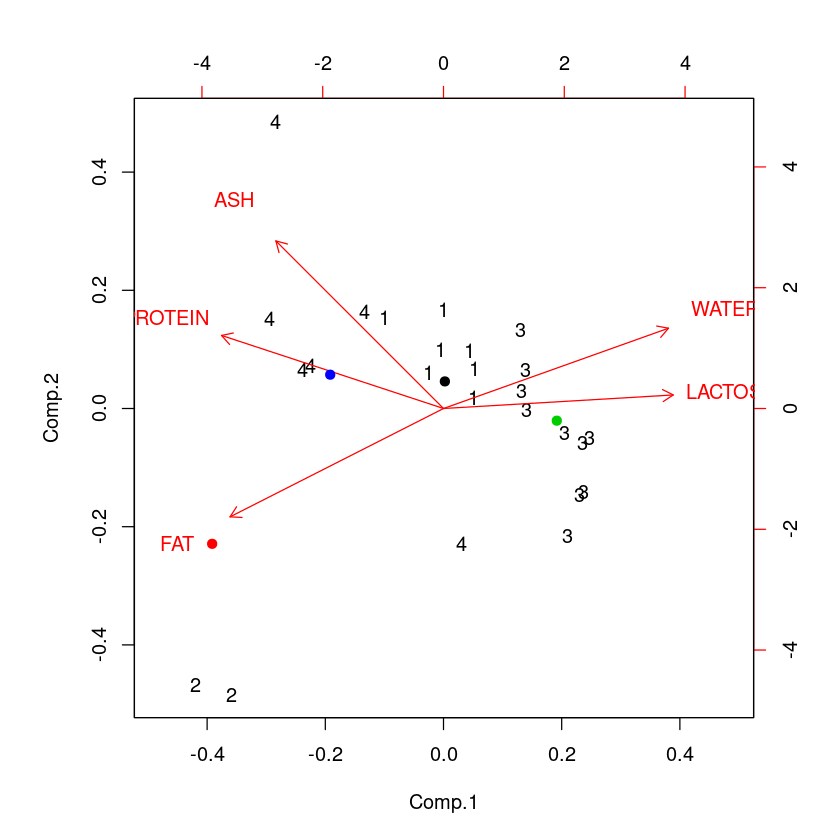

In [5]:
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

<b>R:</b> Al usarse un k de 2 la division es lineal, creandose el grupo de Agua/Lactosa y el grupo Nutritivo, mientras que usando 4 grupos, las divisiones son 1.lactosos,2.grasosos,3.agua-mineral,4. proteinas 

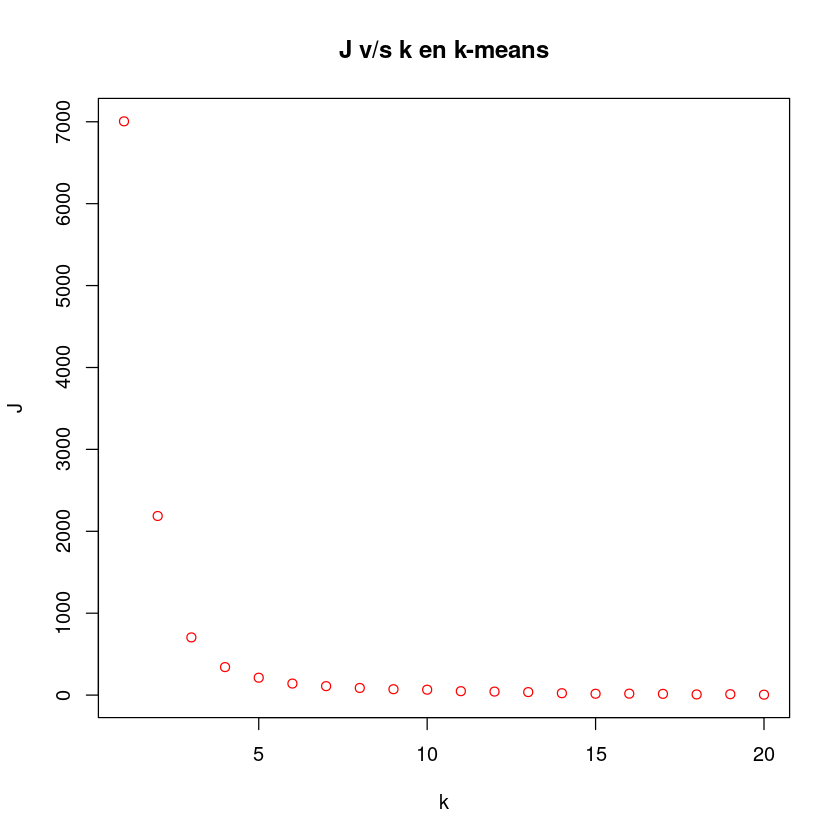

In [6]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20
pendienteK<-vector("list", fin_iter)
valoresK<- vector("list", fin_iter)
valoresJ<- vector("list", fin_iter)
indiceK<-Inf
valorK<-0
valorJ<-0
puntoK<-0
boolean<-TRUE

for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
    pendienteK[[k]]<- indiceK-J[k]
    indiceK<-J[k]
    valoresK[[k]]<-k
    valoresJ[[k]]<-J[k]
    if(boolean & pendienteK[[k]]<10){
        valorK<-pendienteK[[k]]
        puntoK<-(k-1)
        valorJ<-J[k]
        boolean<-FALSE
    }
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 


In [7]:
print(J)

 [1] 7005.08914 2186.82291  704.40373  341.88545  212.50446  141.10612
 [7]  109.51541   87.33708   72.13934   66.16780   47.93601   43.10433
[13]   36.66480   23.27472   16.58508   17.57430   15.40692    8.24885
[19]   11.01830    5.38885


In [21]:
sprintf("K: %i .......Valor : %f ....pendiente: %f ",puntoK,valorJ,valorK)

[1] "K: 8 .......Valor : 76.352662 ....pendiente: 5.971547 "

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

In [25]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.csv("DatosUsoFacebook.csv",header=TRUE,sep=";")
summary(datos)

       R1              R2              R3              R4       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :2.556   Mean   :2.604   Mean   :2.519   Mean   :2.262  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R5              R6              R7              R8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :3.000  
 Mean   :1.348   Mean   :1.882   Mean   :2.374   Mean   :2.642  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :3.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R9             R10             R11             R12       
 Min.   :1.000   Min.   :

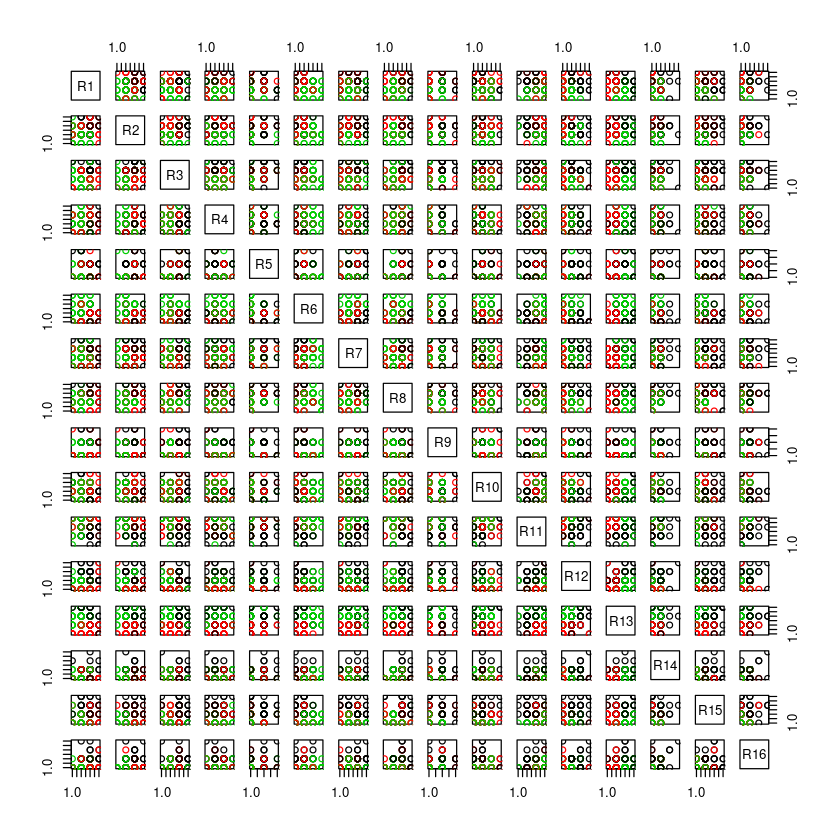

In [35]:
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,1.9640145,-0.2118611,0.09076837,0.1471974,-0.15485951,-0.25717353,-0.05427727,0.08172977,0.15394591,-0.09508331,0.04573208,0.01589104,-0.004451599,0.03094443,-0.01146267,0.06629891
2,-0.6806524,0.7214326,0.89033323,-0.4738746,0.13188445,0.22450509,0.17710495,-0.06281133,-0.05334961,-0.15559670,0.06512680,-0.17119663,0.050037156,0.01114587,-0.04989018,-0.09162176
3,-0.9262562,-0.4079829,-0.76529173,0.2620118,0.01172939,0.01517904,-0.09847078,-0.01151460,-0.07260470,0.19262420,-0.08503539,0.12237023,-0.035909691,-0.03173519,0.04762267,0.02253543


K-means clustering with 3 clusters of sizes 55, 58, 74

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.872727 2.909091 3.018182 2.309091 1.636364 1.690909 2.709091 2.963636
2 2.827586 2.672414 2.241379 2.120690 1.172414 1.603448 2.103448 2.568966
3 2.108108 2.324324 2.364865 2.337838 1.270270 2.243243 2.337838 2.459459
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.690909 1.963636 2.781818 2.309091 2.745455 1.600000 2.400000 1.672727
2 1.310345 2.017241 3.362069 1.431034 1.500000 1.137931 1.534483 1.155172
3 1.216216 1.905405 3.594595 1.567568 3.027027 1.283784 1.351351 1.202703

Clustering vector:
  [1] 3 2 3 3 3 3 3 3 3 3 3 2 3 1 1 2 3 3 1 1 1 2 1 1 2 2 3 3 2 2 3 1 1 3 3 3 2
 [38] 3 3 3 3 2 1 3 2 2 3 2 3 3 2 3 3 1 1 2 3 1 1 1 2 1 2 2 3 1 2 1 1 1 3 2 2 1
 [75] 2 2 3 2 1 3 2 2 1 1 1 3 3 2 3 1 2 1 2 3 1 3 3 3 3 2 1 3 3 2 3 2 3 3 2 3 3
[112] 1 3 1 3 3 1 2 2 2 3 2 2 2 2 2 2 1 3 3 1 3 1 3 1 1 1 1 3 3 2 2 1 1 3 2 1

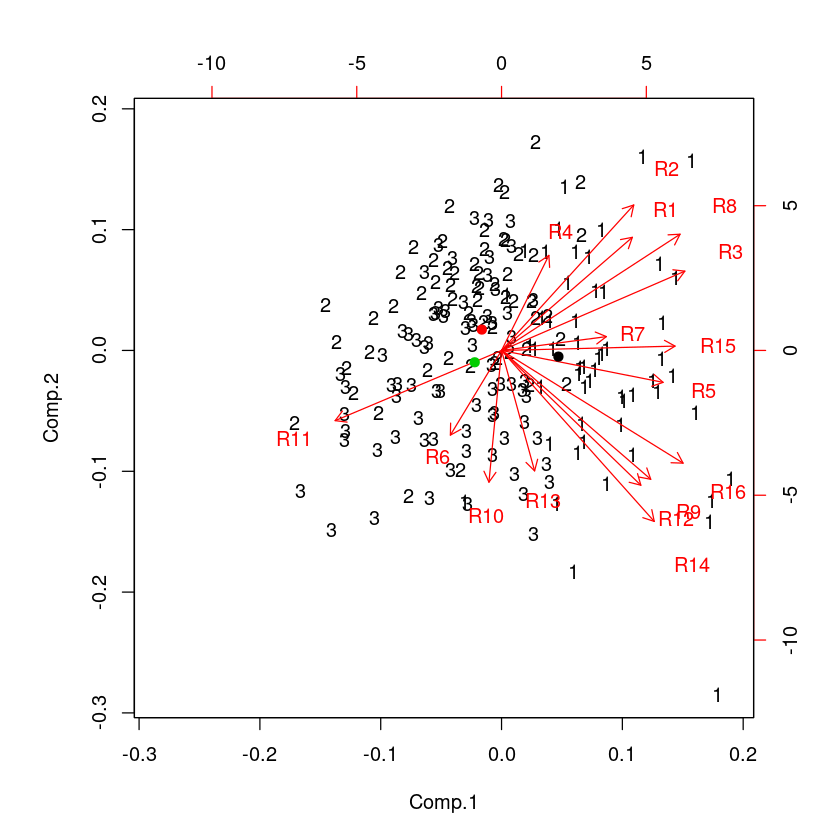

In [36]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not converge in 1000 iterations”Warning message:
“did not co

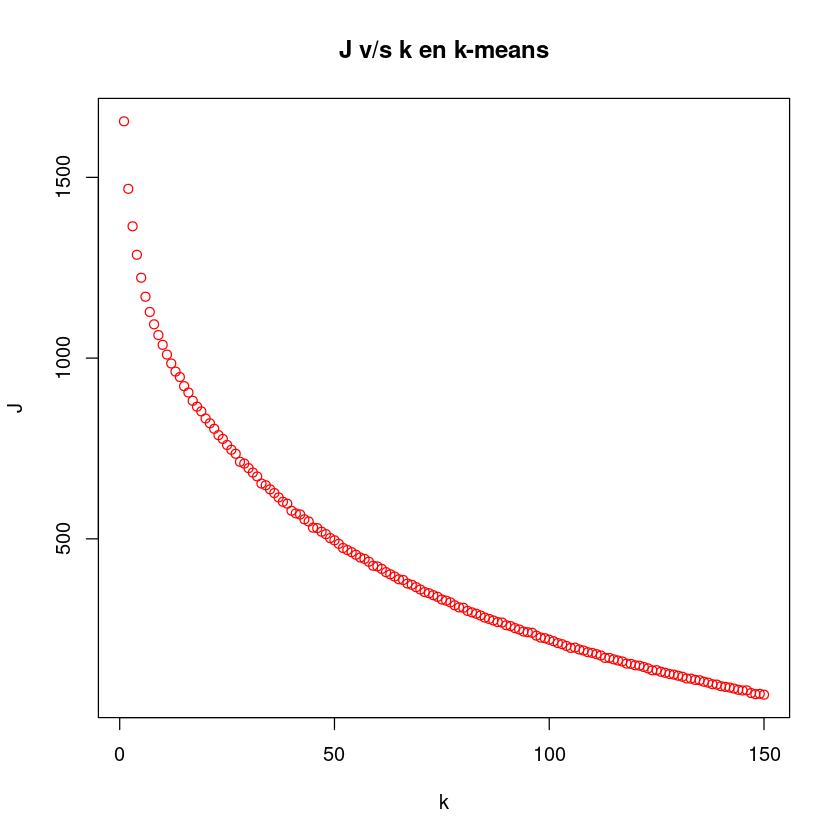

In [44]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,150)
fin_iter<-150
if(TRUE){
    pendienteK<-vector("list", fin_iter)
    valoresK<- vector("list", fin_iter)
    valoresJ<- vector("list", fin_iter)
    indiceK<-Inf
    valorK<-0
    valorJ<-0
    boolean<-TRUE 
}

for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
    if(TRUE){
        pendienteK[[k]]<- indiceK-J[k]
        indiceK<-J[k]
        valoresK[[k]]<-k
        valoresJ[[k]]<-J[k]
        if(boolean & pendienteK[[k]]<10){
            valorK<-(k-1)
            valorJ<-J[k]
            boolean<-FALSE
        }
    }
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 
